# Introduction

Our goal is to determine the most superior Pittsburgh neighborhood by using data provided by the WPDC. and a cruical factor to determining which neighborhood is the best is if its visitor friendly. Someone new to the city would probably want to go somewhere photo friendly to remember the trip by, so a neighborhood's visuals are key. Additionally, an important factor to any trip is accessbility to food since its difficult to prepare meals in a hotel room or taxing have to meal prep in an airbnb.

![travel](https://media.tenor.com/kMva7jHp2ngAAAAM/national-camera-day-donald-duck.gif)

# The Metric

In order to determine whats the best neighborhood for visitors to Pittsburgh we looked at the three crucial things to any trip:
* Public art pieces
* Green spaces
* Restaurants

### Importing Everything

In [50]:
import pandas as pd
import numpy as np
import geopandas
import math
%matplotlib inline
import matplotlib.pyplot as plt

# setting values so it makes manipulating the data easier
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

### Part 1 - Public Art Pieces

Setting up:

In [18]:
# importing the dataset
pittsburgh_public_art_data = pd.read_csv("WPRDCPublicArtData.csv")

Putting the data into a dictionary that holds all the neighborhoods and lists how many public art pieces are in each:

In [19]:
pub_art_dict = {}

neighborhoodname = 0

# a for loop iterrating through the public art dataset's rows
for index, row in pittsburgh_public_art_data.iterrows():
    # setting neighborhoodname as the 'neighborhood' value in the current row
    neighborhoodname = row['neighborhood']
    
    # if the neighborhoodname is a key already in the dict 1 is added to its value
    if neighborhoodname in pub_art_dict:
        pub_art_dict[neighborhoodname] += 1
    # if the neighborhoodname isn't, its added to the dict with a value of 1
    else:
        pub_art_dict[neighborhoodname] = 1
        
# making it a series
pub_art_series = pd.Series(pub_art_dict)

# setting a variable to hold the sorted series
sorted_pub_art_series = pub_art_series.sort_values()

Making it visually interpretable with a graph:

Text(0.5, 0, 'Total Number of Public Art Pieces')

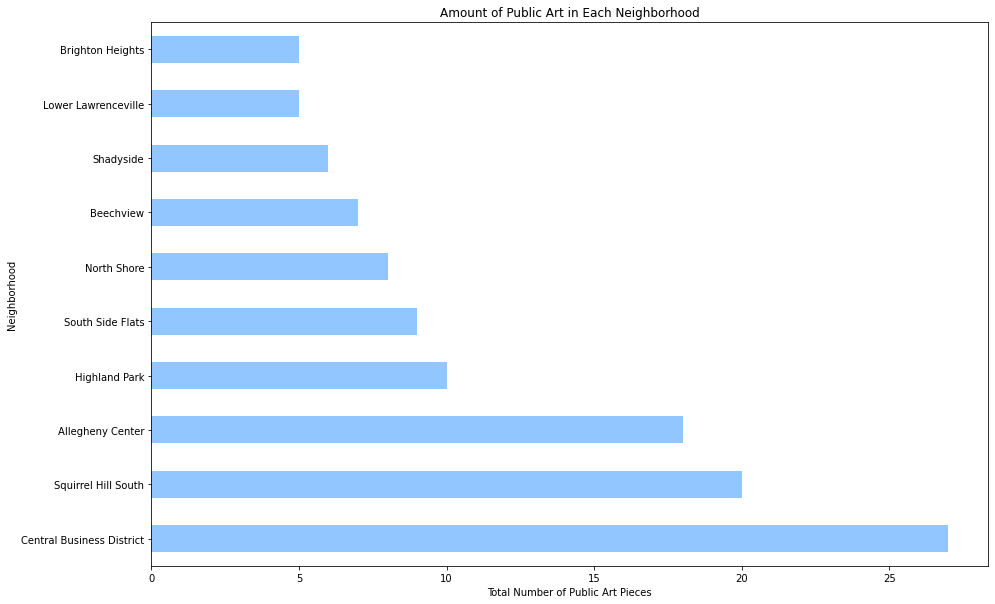

In [20]:
# coloring it
plt.style.use('seaborn-pastel')

# sorting it so that the top 10 neighborhoods appear, nonascending
sorted_pub_art_series.sort_values(ascending = False)[:10].plot.barh(figsize=(15, 10))

# labeling the axises and giving it a title
plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Total Number of Public Art Pieces')

Map version of the same data:
(The darkest purple regions being those with the least art and the light yellow regions being those with the most)

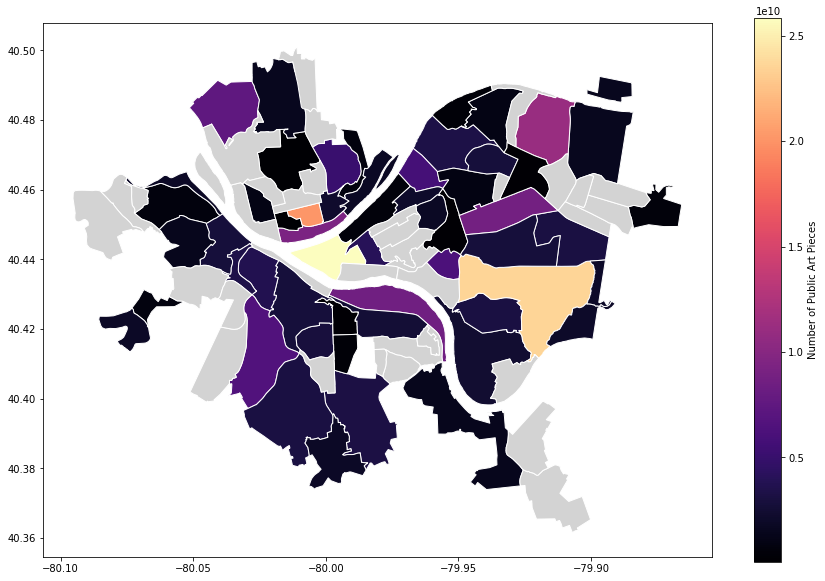

In [21]:
# setting values
num_art_perneigh = pittsburgh_public_art_data.groupby("neighborhood").sum(['id'])
artpubmap = neighborhoods.merge(num_art_perneigh, 
                                how='left', 
                                left_on='hood', 
                                right_on='neighborhood')

# plotting the data and setting how it'll look
artpubmap.plot(column='id',cmap='magma',              
               edgecolor="white",        
               legend=True,           
               legend_kwds={'label': "Number of Public Art Pieces"},
               figsize=(15, 10),       
               missing_kwds={"color": "lightgrey"})

Overall it looks like the top three neighborhoods with the most public art pieces are:
1. Central Business District
2. Squirrel Hill South
3. Allegheny Center

Although just because a neighborhood has some art pieces, that solely doesn't decide how good it is. The type of each art piece is a crucial indicator of how good it is. Objectively, Modern and Contemporary Art is the best since its fresh for the eyes, second being Historic Art, third as Individual and Historic Monuments, and War Memorials as last since the atmosphere of a war memorial is not one most look for during trips/visits. Counting how many public art pieces each neighborhood has with weighted values using a point system:

In [22]:
pubartweighed = {}

borhoodweighed = 0

# creating a variable to hold a value of whatever type of art the piece is
kindaart = 0
for index, row in pittsburgh_public_art_data.iterrows():
    borhoodweighed = row['neighborhood']
    # setting kindaart as the 'art_type' value in the current row
    kindaart = row['art_type']
    if borhoodweighed in pubartweighed:
        # if the kinddart is Historic Art, it is worth 4 points
        if kindaart == "Historic Art":
            pubartweighed[borhoodweighed] += 4
        # if the kinddart is Individual and Historic Art, it is worth 3 points
        elif kindaart == "Individual and Historic Monuments":
            pubartweighed[borhoodweighed] += 3
        # if the kinddart is Modern and Contemporary Art, it is worth 5 points
        elif kindaart == "Modern and Contemporary Art":
            pubartweighed[borhoodweighed] += 5
        # if the kinddart is War Memorials, it is worth 2 points
        elif kindaart == "War Memorials":
            pubartweighed[borhoodweighed] += 2
        # if there is no 'art_type' the piece is worth 1 point instead of none since its still an art piece and more art is better than none
        else:
            pubartweighed[borhoodweighed] += 1
    else:
        if kindaart == "Historic Art":
            pubartweighed[borhoodweighed] = 4
        elif kindaart == "Individual and Historic Monuments":
            pubartweighed[borhoodweighed] = 3
        elif kindaart == "Modern and Contemporary Art":
            pubartweighed[borhoodweighed] = 5
        elif kindaart == "War Memorials":
            pubartweighed[borhoodweighed] = 2
        else:
            pubartweighed[borhoodweighed] = 1

Now that the dict is filled with weighted data, lets turn it into a bar graph to further determine conclusions:

Text(0.5, 0, 'Good Art')

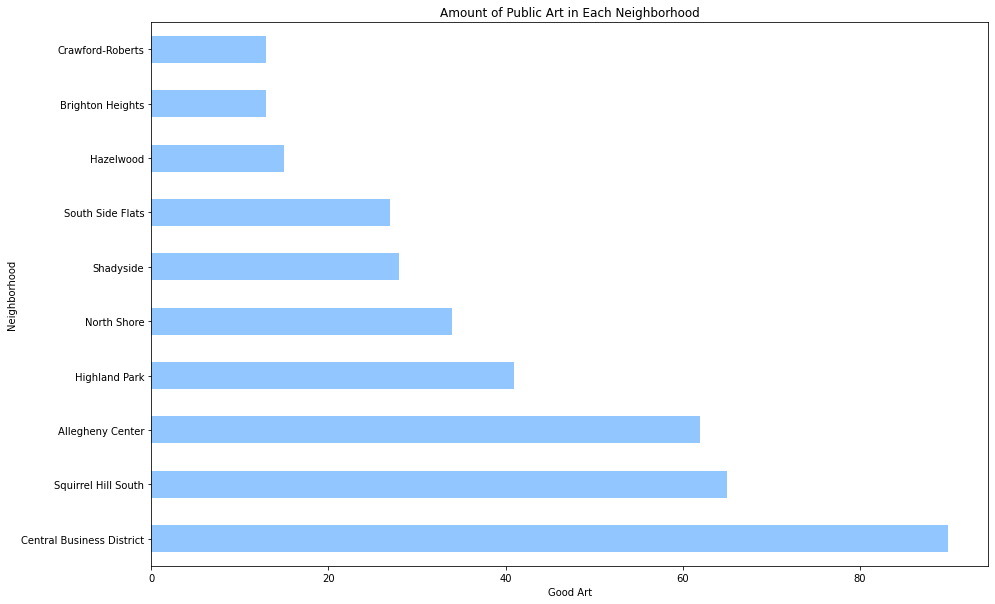

In [23]:
pubartweighed_series = pd.Series(pubartweighed)
sorted_pubartweighed_series = pubartweighed_series.sort_values()

sorted_pubartweighed_series.sort_values(ascending = False)[:10].plot.barh(figsize=(15, 10))

plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Good Art')

Visualizing the data as a map:

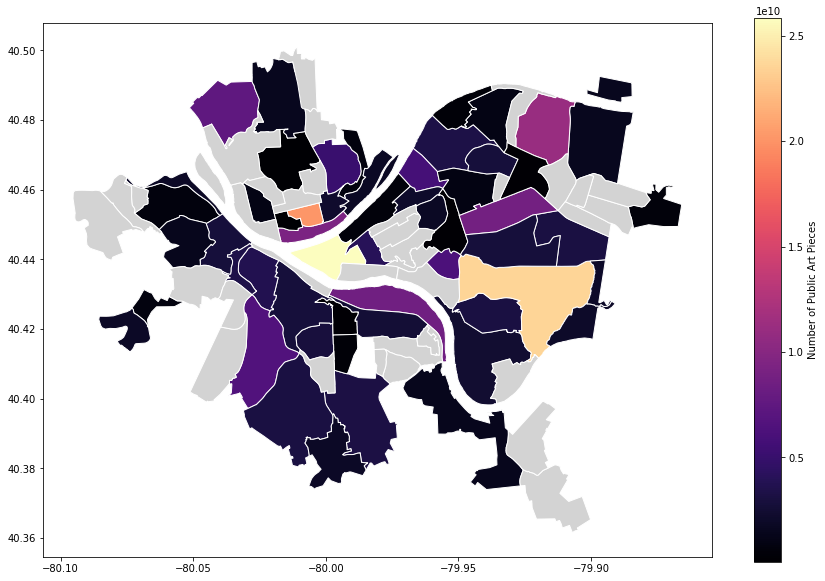

In [24]:
num_art_perneighwei = pittsburgh_public_art_data.groupby("neighborhood").sum(['id'])
artpubweimap = neighborhoods.merge(num_art_perneighwei, 
                                how='left', 
                                left_on='hood', 
                                right_on='neighborhood')

artpubweimap.plot(column='id',cmap='magma',              
               edgecolor="white",        
               legend=True,           
               legend_kwds={'label': "Number of Public Art Pieces"},
               figsize=(15, 10),       
               missing_kwds={"color": "lightgrey"})

Similar to the unweighted data, the top three neighborhoods with the highest ranking remain unchanged. Those being:
1. Central Business District
2. Squirrel Hill South
3. Allegheny Center

Although the some of the neighborhoods in the overall top 10 changed. For example Crawford-Roberts didn't breach the top 10 in the unweighted but did with weighted values. On the other hand, Beechview dropped from the top 10 when weights were added.

### Part 2 - Greenways (Lucas)

To determine the best neighborhood in Pittsburgh for tourists, I chose to analyze the Pittsburgh greenways dataset. Keep in mind that this is a very small dataset as most neighborhoods in Pittsburgh do not have greenways. Combined with the other 2 metrics, this dataset will help determine the best neighborhoods in Pittsburgh. 

It's also important to note that there is a difference between green spaces and greenways. Greenways are a type of green space that include a path running through a green space in an urban area. We believe that this is a good metric because it represents both nature and walkability as a metric.

------

I started by importing the dataset and filtering out the columns that weren't associated with a specific neighborhood in Pittsburgh or may have been located outside of the city.

In [46]:
greenways = pd.read_csv("Greenways1.csv", sep=',') #reading in the csv


name = greenways["name"]
acres = greenways["acres"]
nhood = greenways["nhood"]
area = greenways["area"]
greenways.dropna() #dropping NaN values


#importing the relevant columns 
greenways_chart = greenways[["name", "nhood", "acres"]]
greenways_chart.sort_values("acres", ascending=False)
greenways_chart.dropna() #dropping NaN values

,name,nhood,acres
1,Beechview Seldom Seen,Beechview,42.675715
2,Hazelwood,Hazelwood,5.892662
3,Perry South,Perry South,12.813072
4,Moore,Brookline,27.584601
5,Observatory Hill Hollows,Perry North,17.938010
7,Oakcliffe,South Oakland,5.111240
9,Nine Mile Run,Squirrel Hill South,11.671171


------------------

According to the graph, the 3 neighborhoods with the most acres of green space are Beechview, Brookline, and Perry North.

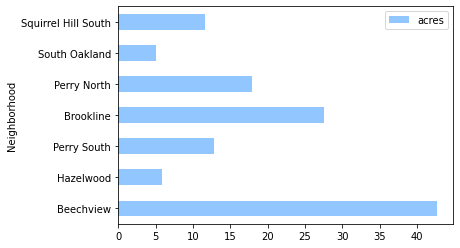

In [47]:
greenways_chart = greenways_chart.dropna() #had to drop NaN values again
greenways_chart.head(10).plot.barh(x='nhood', y='acres', xlabel = 'Neighborhood', ylabel = 'acres') #plotting

----------------
For some reason, Geopandas wouldn't let me set use the acres column in the map, so heres another chart using the area instead.

In [48]:
area_chart = greenways[["name", "nhood", "area"]]
area_chart.sort_values("area", ascending=False) 
#not dropping NaN values this time since pandas wouldn't let me drop them and sort in descending order.

,name,nhood,area
0,Spring Hill Spring Garden,NaN,2.064316e+06
1,Beechview Seldom Seen,Beechview,1.858947e+06
6,Allegheny River,NaN,1.523838e+06
4,Moore,Brookline,1.201580e+06
8,Bigelow,NaN,1.053815e+06
5,Observatory Hill Hollows,Perry North,7.813766e+05
3,Perry South,Perry South,5.581352e+05
9,Nine Mile Run,Squirrel Hill South,5.083942e+05
2,Hazelwood,Hazelwood,2.566833e+05
7,Oakcliffe,South Oakland,2.226447e+05


Heres the same table but using area instead of acres. As you can see, the ranking is still the same (ignoring the NaN values that could not be filtered out this time).

----------------

ValueError: The dataframe and given column have different number of rows.

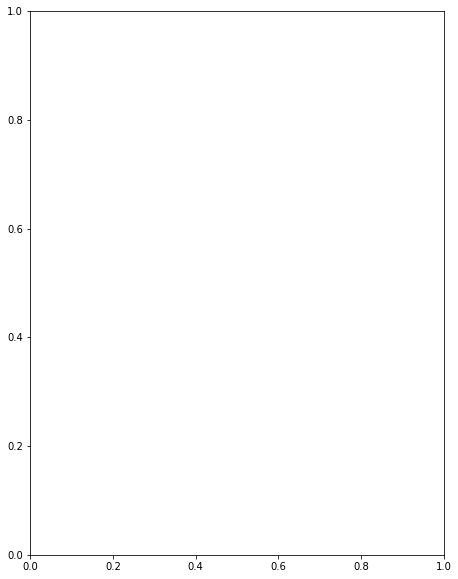

In [64]:
green_map = neighborhoods.merge(greenways, how = 'left', left_on = 'hood', right_on = 'nhood') 
#merging the neighborhood and greenway datasets

green_map.plot(column = 'area', cmap = 'Greens', edgecolor = 'White', legend = True, 
               legend_kwds = {'label': 'Greenways in each neighborhood by total Area'}, figsize = (12, 10), 
               missing_kwds = {'color': 'lightgrey'})
#plotting and customizing the map

Here is the final map of the neighborhoods by greenway area.

-----------------

## Personal Conclusion

Since there are only a few neighborhoods with greenways, I've come to the conclusion that all the neighborhoods listed here are the best for visitors with Beechview, Brookline, and Perry North being the top 3.

### Part 3 - Restaurants

In [14]:
dataRestaurants = pd.read_csv("https://data.wprdc.org/datastore/dump/112a3821-334d-4f3f-ab40-4de1220b1a0a")
dataRestaurants.head(5)

#loading in file 

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
0,10762,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,250,Social Club-Bar Only,...,1969-01-01,NaN,60.0,NaN,NaN,1,1.0,-79.795408,40.389352,830 Sylvan Ave PA 15137
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216
3,10707,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,1987-03-01,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,Box 39 PA 15064
4,10711,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,201,Restaurant with Liquor,...,1984-06-17,NaN,75.0,NaN,NaN,1,1.0,-80.135185,40.355935,540 3rd Avenue PA 15017


In [15]:
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-100', 'Pittsburgh-101', 'Pittsburgh-102', 'Pittsburgh-103', 'Pittsburgh-104', 'Pittsburgh-105', 'Pittsburgh-106'], ['Sewickley', 'Sewickley Hts.', 'Sewickley Hills', 'Shaler', 'Sharpsburg', 'South Fayette', 'South Park'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-107', 'Pittsburgh-108', 'Pittsburgh-109', 'Pittsburgh-110', 'Pittsburgh-111', 'Pittsburgh-112'], ['South Versailles', 'Springdale Borough', 'Springdale Township', 'Stowe', 'Swissvale', 'Tarentum'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-113', 'Pittsburgh-114', 'Pittsburgh-115', 'Pittsburgh-116', 'Pittsburgh-117', 'Pittsburgh-118'], ['Thornburg', 'Trafford', 'Turtle Creek', 'Upper St. Clair', 'Verona', 'Versailles'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-119', 'Pittsburgh-120', 'Pittsburgh-121', 'Pittsburgh-122', 'Pittsburgh-123', 'Pittsburgh-124'], ['Wall', 'West Deer', 'West Elizabeth', 'West Homestead', 'West Mifflin', 'West View'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-125', 'Pittsburgh-126', 'Pittsburgh-127', 'Pittsburgh-128', 'Pittsburgh-129', 'Pittsburgh-130'], ['Whitaker', 'White Oak', 'Whitehall', 'Wilkins', 'Wilkinsburg', 'Wilmerding'])

#manually changing municipal numbers to their respective names

In [21]:
pitt_only = dataRestaurants.loc[dataRestaurants['city']== 'Pittsburgh']
pitt_only.head(5)

#since the data lists all restaurants in the Alleghany County, I had to grab only the ones in Pittsburgh

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216
6,10734,Holiday Park Volunteer Fire Dept,415,Abers Creek Road,Pittsburgh,PA,15239.0,Plum,408,Firehall with Liquor,...,1957-01-01,NaN,125.0,NaN,NaN,1,1.0,-79.705888,40.467302,415 Abers Creek Road PA 15239
11,10605,McArdle Tavern,1600,Bingham Street,Pittsburgh,PA,15203.0,Verona,201,Restaurant with Liquor,...,1984-06-17,NaN,30.0,NaN,NaN,1,1.0,-79.982503,40.429411,1600 Bingham Street PA 15203
12,10606,Arlington Vets Association,1751,Arlington Ave,Pittsburgh,PA,15210.0,Verona,250,Social Club-Bar Only,...,1984-06-17,2017-07-13,30.0,NaN,NaN,7,1.0,-79.984543,40.417903,1751 Arlington Ave PA 15210


In [20]:
status = pitt_only.loc[dataRestaurants['status']== 1]
status.head(5)

#grabbing only the restaurants that are still active (1 = active, 7 = inactive)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
6,10734,Holiday Park Volunteer Fire Dept,415,Abers Creek Road,Pittsburgh,PA,15239.0,Plum,408,Firehall with Liquor,...,1957-01-01,NaN,125.0,NaN,NaN,1,1.0,-79.705888,40.467302,415 Abers Creek Road PA 15239
11,10605,McArdle Tavern,1600,Bingham Street,Pittsburgh,PA,15203.0,Verona,201,Restaurant with Liquor,...,1984-06-17,NaN,30.0,NaN,NaN,1,1.0,-79.982503,40.429411,1600 Bingham Street PA 15203
13,10636,Pittsburgh Golf Club Restaurant,5280,Northumberland Street,Pittsburgh,PA,15217.0,Trafford,201,Restaurant with Liquor,...,1986-01-01,NaN,220.0,NaN,NaN,1,1.0,-79.939449,40.440229,5280 Northumberland Street PA 15217
23,37160,Calvary United Methodist Church,971,Beech Avenue,Pittsburgh,PA,15233.0,West Homestead,407,Church Kitchen,...,1984-06-17,NaN,NaN,NaN,100.0,1,1.0,-80.018690,40.452211,971 Beech Avenue PA 15233
32,199904220005,Yeshiva Nechama Minsky Girls School & Preschool,6401,Forbes Avenue,Pittsburgh,PA,15217.0,Trafford,651,School Full Service Kitchen,...,1999-04-12,NaN,NaN,NaN,0.0,1,1.0,-79.917289,40.438414,6401 Forbes Avenue PA 15217


In [41]:
active = status.groupby("municipal").size()
active.head(10)

#grouping the neighborhoods together to see how many restaurants are in each

municipal
All Municipalities    30
Aspinwall             23
Avalon                28
Baldwin Boro          61
Baldwin Twp           11
Bellevue              64
Ben Avon               2
Ben Avon Hgts          1
Bethel Park           45
Blawnox               16
dtype: int64

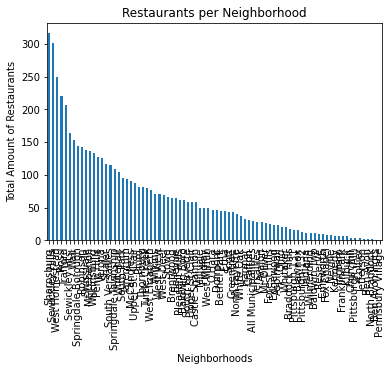

In [42]:
active.sort_values(ascending = False).plot.bar(title = "Restaurants per Neighborhood", xlabel = 'Neighborhoods', ylabel = 'Total Amount of Restaurants')

#sorting the neighborhoods in descending order and then putting it into a bar chart

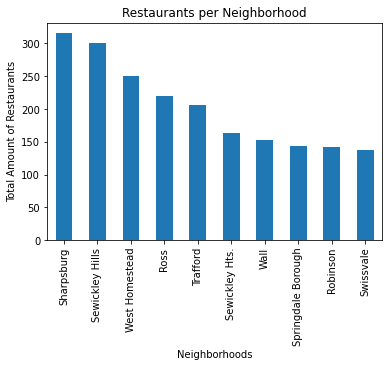

In [43]:
active.sort_values(ascending = False)[:10].plot.bar(title = "Restaurants per Neighborhood", xlabel = 'Neighborhoods', ylabel = 'Total Amount of Restaurants')

#sorting them in descending value and then creating a bar chart with only the top 10 

The graph shows that **Sharpsburg** has the most amount of restaurants followed by **Sewickley Hills** and then **West Homestead**

# The Best Neighborhood

Overall after looking at the overlaps between our different metrics, the best neighborhood was 

![car](https://media.tenor.com/U5aKaFbfdD0AAAAM/cony-brown.gif)

# Conclusion

**Min Yi:** Personally I like the Central Business Disctrict since it is more city-like and my own data also happened to align with that as the best.

**Lucas:**

**Van:** I chose West Homestead because it is the only neighborhood in my top 10 that I have been to.